# SENTIMEN ANALISIS PILPRES 2024
Muchammad Fahd Ishamuddin
41155050180048

In [97]:
%matplotlib inline

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [302]:
data = pd.read_csv('2022pilpres.csv')
print('data ada sebanyak',len(data),'baris')
data = data.drop('Unnamed: 0', axis = 1)
data.columns
data.dtypes

data ada sebanyak 93882 baris


date         object
id          float64
tweet        object
username     object
dtype: object

In [303]:
data.isnull().sum()

date        0
id          3
tweet       3
username    6
dtype: int64

In [304]:
data = data.dropna()
data.isnull().sum()
len(data)

93876

In [305]:
data.tweet.iloc[3]

'Baru Lolos Sebagai Peserta Pemilu 2024, Partai Ummat Mau Bahas soal Dukungan Pilpres 2 Bulan Lagi https://t.co/5JDqsJAclq'

In [306]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 3153 data yang terduplikasi


In [307]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)


,index,size
86025,Tumbangkan rezim oligarki! Dukung aniesbasweda...,48
40994,Indonesia menolak Capres dan Cawapres yang did...,48
27176,Bersama aniesbaswedan kita tegakkan sistem khi...,47
40981,"Indonesia damai tanpa kaum intoleran, kaum rad...",47
53688,Menangkan aniesbaswedan pada #Pilpres2024! Wuj...,47
...,...,...
30360,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30359,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30358,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30357,Demokrat Dengar Ada 'Genderuwo' Ingin Jegal An...,1


In [308]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 815 yang memiliki cuitan yang sama dengan total 3153 tweet


In [309]:
data = data.drop_duplicates(subset=['tweet'])

In [310]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [311]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
0,! Boom ! Airlangga - Ganjar pasangan ideal di ...,1
60511,"PPP Riau Pasang Foto Anies Baswedan , Bakal Us...",1
60487,"PPP Masih Pertimbangkan Erick, Ganjar, Sandiag...",1
60486,PPP Maluku Usulkan Duet Ganjar-Anies di Pilpre...,1
60485,PPP Maluku Usulkan Duet Ganjar-Anies di Pilpre...,1
...,...,...
30239,"Demokrat Buka Pintu, Undang Parpol Lain Berkoa...",1
30238,Demokrat Bongkar Faktor yang Bikin Publik Bosa...,1
30237,Demokrat Bidik Anies Baswedan sebagai Bacapres...,1
30236,Demokrat Bersyukur AHY Dianggap Pantas Jadi Ca...,1


In [313]:
len(data)

90723

In [314]:
x= data.username
c={}
q=0
for name in x:
    c[name] = c.get(name,0)+1
# print(c)
c = pd.DataFrame({'usename':c.keys(),'count':c.values()})
print (c)
c.info()
c.to_csv('username_count1.csv')
data.username.value_counts()

               usename  count
0            Fuad_Lha9     21
1          iwan_tata98      4
2            Lima8Satu     33
3      21BeritaTerkini    204
4          rezakaisar3      4
...                ...    ...
21876        EdwinSltg      1
21877     MemenWongso3      1
21878    wahyu_minarno      1
21879        Azhari25_      1
21880       ninovendri      1

[21881 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21881 entries, 0 to 21880
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   usename  21881 non-null  object
 1   count    21881 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 342.0+ KB


jpnncom          1121
fajaronline       984
detikcom          654
WartaEkonomi      644
Indopolitika      449
                 ... 
nonafren21          1
adaaaqua1           1
ajinoera            1
Jundi72717202       1
ninovendri          1
Name: username, Length: 21881, dtype: int64

In [315]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,"Berkat kinerja di BUMN, serta kedekatan dengan...",Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,@ganjarpranowo menggandeng ulama hingga tokoh ...,iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,Mantap 👍👍\nElektabilitas Menteri BUMN Erick Th...,Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,"Baru Lolos Sebagai Peserta Pemilu 2024, Partai...",21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,Agenda politik negara tuan rumah Piala Dunia 2...,rezakaisar3
...,...,...,...,...
93877,2022-01-01 03:05:00+00:00,1.477114e+18,PA 212 Novel Bamukmin mengaku sudah mantap ma...,sjahtie
93878,2022-01-01 02:24:46+00:00,1.477103e+18,PKS Ingin Ada 3 Poros Koalisi di Pilpres 2024 ...,jawapos
93879,2022-01-01 02:08:17+00:00,1.477099e+18,"@Listy9021 @BNPTRI @BPIPRI MET tahun baru Sis,...",BANGSAygSUJUD
93880,2022-01-01 00:38:55+00:00,1.477077e+18,"Bursa Pilpres 2024, Anies Baswedan Makin Melej...",teropongmetro


In [316]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    tweet = re.sub(r'\brt', '', tweet)
    return tweet
data['tweet']=data['tweet'].apply(preprocess_tweet2)

In [318]:
data.tweet.iloc[43]

'peneliti utama politik badan riset dan inovasi nasional brin siti zuhro mendukung puan maharani untuk menjadi calon presiden di pilpres  puan capres pdip'

In [273]:
from tqdm import tqdm
data['tweet'] = tqdm(data['tweet'].apply(preprocess_tweet2))

100%|██████████| 110849/110849 [00:00<00:00, 1918362.78it/s]


In [319]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat kinerja di bumn serta kedekatan dengan ...,Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,menggandeng ulama hingga tokoh agama dalam mem...,iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,baru lolos sebagai peserta pemilu partai umma...,21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia ...,rezakaisar3
...,...,...,...,...
93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mengaku sudah mantap maju ...,sjahtie
93878,2022-01-01 02:24:46+00:00,1.477103e+18,pks ingin ada poros koalisi di pilpres,jawapos
93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun baru sis semoga tahun ini damai meli...,BANGSAygSUJUD
93880,2022-01-01 00:38:55+00:00,1.477077e+18,bursa pilpres anies baswedan makin melejit l...,teropongmetro


In [320]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 14909 data yang terduplikasi


In [321]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [322]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
data['tweet'] = data['tweet'].apply(tokenize_column)

/var/folders/md/n3wx2h2116zfry84m6sz4k5w0000gn/T/ipykernel_33805/2330011971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(tokenize_column)


In [323]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,"[berkat, kinerja, di, bumn, serta, kedekatan, ...",Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,"[menggandeng, ulama, hingga, tokoh, agama, dal...",iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,"[mantap, elektabilitas, menteri, bumn, erick, ...",Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,"[baru, lolos, sebagai, peserta, pemilu, partai...",21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,"[agenda, politik, negara, tuan, rumah, piala, ...",rezakaisar3
...,...,...,...,...
93876,2022-01-01 03:29:34+00:00,1.477120e+18,"[mbak, puan, memang, keren, sekali, rakyat, ti...",AswanaAktivix
93877,2022-01-01 03:05:00+00:00,1.477114e+18,"[pa, novel, bamukmin, mengaku, sudah, mantap, ...",sjahtie
93879,2022-01-01 02:08:17+00:00,1.477099e+18,"[met, tahun, baru, sis, semoga, tahun, ini, da...",BANGSAygSUJUD
93880,2022-01-01 00:38:55+00:00,1.477077e+18,"[bursa, pilpres, anies, baswedan, makin, melej...",teropongmetro


In [324]:
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stem_stopword(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in stemmed_batch]

    return cleaned_batch

# Ukuran batch yang diinginkan
batch_size = 1000

# Menghitung jumlah batch yang diperlukan
num_batches = len(data) // batch_size + 1

preprocessed_data = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = data['tweet'].iloc[start_idx:end_idx].astype(str)

    preprocessed_batch = stem_stopword(batch_data)
    preprocessed_data.extend(preprocessed_batch)

# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = preprocessed_data

# Hasil preprocessing data
print(data)

                            date            id  \
0      2022-12-30 23:50:32+00:00  1.608974e+18   
1      2022-12-30 23:50:16+00:00  1.608974e+18   
2      2022-12-30 23:40:27+00:00  1.608971e+18   
3      2022-12-30 23:36:07+00:00  1.608970e+18   
4      2022-12-30 23:26:47+00:00  1.608968e+18   
...                          ...           ...   
93876  2022-01-01 03:29:34+00:00  1.477120e+18   
93877  2022-01-01 03:05:00+00:00  1.477114e+18   
93879  2022-01-01 02:08:17+00:00  1.477099e+18   
93880  2022-01-01 00:38:55+00:00  1.477077e+18   
93881  2022-01-01 00:37:00+00:00  1.477076e+18   

                                                   tweet         username  
0      berkat bumn perintah elektabilitas tingkat das...        Fuad_Lha9  
1      gandeng ulama tokoh agama suasana adem jelang ...      iwan_tata98  
2      mantap elektabilitas menteri bumn erick thohir...        Lima8Satu  
3           lolos milu partai ummat bahas dukung pilpres  21BeritaTerkini  
4      agenda polit

/var/folders/md/n3wx2h2116zfry84m6sz4k5w0000gn/T/ipykernel_33805/29094851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = preprocessed_data


In [61]:
data.to_csv('scrap_stoop1.csv')

In [325]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 2530 data yang terduplikasi


In [326]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [327]:
data.isnull().sum()

date        0
id          0
tweet       0
username    0
dtype: int64

In [112]:
data.to_csv('stemstopclean1.csv')

In [3]:
data = pd.read_csv('stemstopclean.csv')

In [328]:
data = data.dropna()
print(data.isnull().sum())
len(data)

date        0
id          0
tweet       0
username    0
dtype: int64


73284

In [126]:
# def tokenize_column(text):
#     if isinstance(text, str):  # Memastikan bahwa text adalah string
#         return word_tokenize(text)
#     else:
#         return []  # Mengembalikan list kosong jika text bukan string

# # Contoh penggunaan:
# data['tweet'] = data['tweet'].apply(tokenize_column)

In [226]:
# bar = data[data['tweet'].str.contains('golkar')]
# print(len(bar))

1656


In [329]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(labelling)

In [56]:
%pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [58]:
from Sastrawi.Normalisasi import Normalisasi
teks = "Saya mau bljr yg bner"

# Normalisasi teks
teks_normalisasi = norm().normalize(teks)

# Output hasil normalisasi
print(teks_normalisasi)

ModuleNotFoundError: No module named 'Sastrawi.Normalisasi'

In [285]:
data=data.drop(columns=['level_0','index'])
data

KeyError: "['level_0', 'index'] not found in axis"

In [1]:
data.to_csv('datasiap2.csv')

NameError: name 'data' is not defined

In [330]:
data

,date,id,tweet,username,sentiment
0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat bumn perintah elektabilitas tingkat das...,Fuad_Lha9,Positive
1,2022-12-30 23:50:16+00:00,1.608974e+18,gandeng ulama tokoh agama suasana adem jelang ...,iwan_tata98,Positive
2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu,Neutral
3,2022-12-30 23:36:07+00:00,1.608970e+18,lolos milu partai ummat bahas dukung pilpres,21BeritaTerkini,Neutral
4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia j...,rezakaisar3,Positive
...,...,...,...,...,...
93875,2022-01-01 03:36:41+00:00,1.477122e+18,kelompok narasi bodoh yg percaya yg dukung pil...,benzz1203,Negative
93876,2022-01-01 03:29:34+00:00,1.477120e+18,mbak puan keren rakyat suguh baliho beras grat...,AswanaAktivix,Positive
93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mantap maju pd pilpres novel...,sjahtie,Positive
93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun sis moga tahun damai liput tahun tia...,BANGSAygSUJUD,Positive


In [332]:
data.sentiment.value_counts()

Neutral     32202
Positive    29495
Negative    11587
Name: sentiment, dtype: int64

In [198]:
data = data.reset_index()

In [288]:
len(data)

93626

In [333]:
data

,date,id,tweet,username,sentiment
0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat bumn perintah elektabilitas tingkat das...,Fuad_Lha9,Positive
1,2022-12-30 23:50:16+00:00,1.608974e+18,gandeng ulama tokoh agama suasana adem jelang ...,iwan_tata98,Positive
2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu,Neutral
3,2022-12-30 23:36:07+00:00,1.608970e+18,lolos milu partai ummat bahas dukung pilpres,21BeritaTerkini,Neutral
4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia j...,rezakaisar3,Positive
...,...,...,...,...,...
93875,2022-01-01 03:36:41+00:00,1.477122e+18,kelompok narasi bodoh yg percaya yg dukung pil...,benzz1203,Negative
93876,2022-01-01 03:29:34+00:00,1.477120e+18,mbak puan keren rakyat suguh baliho beras grat...,AswanaAktivix,Positive
93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mantap maju pd pilpres novel...,sjahtie,Positive
93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun sis moga tahun damai liput tahun tia...,BANGSAygSUJUD,Positive


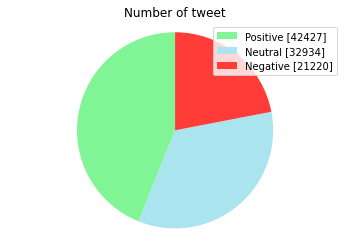

In [249]:
p = 42427
net = 32934
neg = 21220
labels = ['Positive ['+str(p)+']' , 'Neutral ['+str(net)+']','Negative ['+str(neg)+']']
size = [p,net,neg]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(size, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Number of tweet')
plt.axis('equal')
plt.show()

In [76]:
# X_train.shape
# X_train.shape
# y_train.shape
X_test.shape
# y_test.shape

(381, 3283)

epoch: 1 acc: 0.7054168372219948
epoch: 2 acc: 0.7026879519716196
epoch: 3 acc: 0.703643061809251
epoch: 4 acc: 0.7052803929594761
epoch: 5 acc: 0.6905444126074498
epoch: 6 acc: 0.703643061809251
epoch: 7 acc: 0.7106017191977078


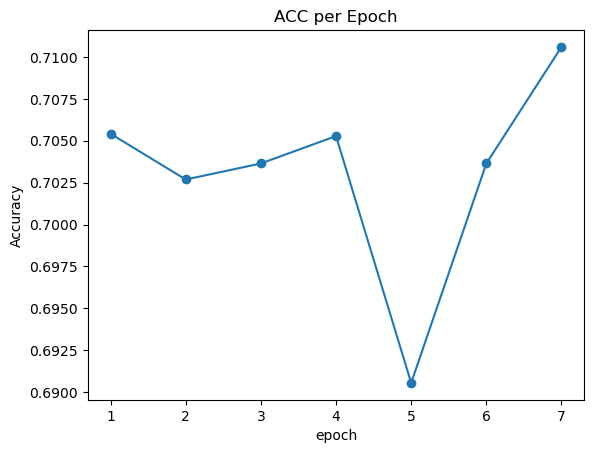

Akurasi: 71.06%


In [356]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(data['tweet'].astype(str))
# Y = vectorizer.fit_transform(data['sentiment'])

epoch = 7
accuracy_values = np.zeros(epoch)
# Membagi data menjadi data latih dan data uji
for epochs in range(epoch):
    X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.1, random_state=None)
    naive_bayes = MultinomialNB()
    training = naive_bayes.fit(X_train, y_train)
    prediction =  naive_bayes.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    accuracy_values[epochs] = accuracy

    print("epoch:", epochs + 1, "acc:", accuracy)
plt.plot(range(1,epoch + 1), accuracy_values, marker='o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('ACC per Epoch')
plt.show()



y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

In [251]:
print(X)

  (0, 2531)	1
  (0, 2402)	1
  (0, 1249)	1
  (0, 3225)	1
  (0, 480)	4
  (0, 2744)	1
  (0, 655)	1
  (0, 1798)	1
  (0, 783)	1
  (0, 2378)	1
  (0, 410)	1
  (1, 1064)	1
  (1, 624)	1
  (1, 2307)	1
  (1, 1109)	1
  (1, 683)	1
  (1, 768)	1
  (1, 1737)	1
  (1, 131)	1
  (1, 680)	1
  (1, 2898)	1
  (2, 624)	1
  (2, 2307)	1
  (2, 1251)	1
  (2, 1024)	2
  :	:
  (1898, 785)	1
  (1899, 2307)	1
  (1899, 2892)	1
  (1899, 1872)	1
  (1899, 3123)	1
  (1899, 473)	1
  (1899, 387)	1
  (1900, 2307)	1
  (1900, 131)	1
  (1900, 1251)	1
  (1900, 1782)	1
  (1900, 468)	1
  (1900, 2369)	1
  (1900, 1559)	1
  (1901, 2307)	1
  (1901, 131)	1
  (1901, 858)	1
  (1901, 3024)	1
  (1901, 1694)	1
  (1901, 1498)	1
  (1901, 775)	1
  (1901, 1198)	1
  (1901, 969)	1
  (1901, 3106)	1
  (1901, 66)	1


Iterasi 1: 0.7097830536225952
Iterasi 2: 0.708691499522445
Iterasi 3: 0.7085550552599263
Iterasi 4: 0.7208350388866148
Iterasi 5: 0.7142857142857143
Iterasi 6: 0.7140128257606768
Iterasi 7: 0.7095101650975576
Iterasi 8: 0.7014599536089507
Iterasi 9: 0.7071906126347387
Iterasi 10: 0.7155137126483831
10
Rata-rata skor akurasi: 71.10 %
Skor tertinggi: 72.08 %


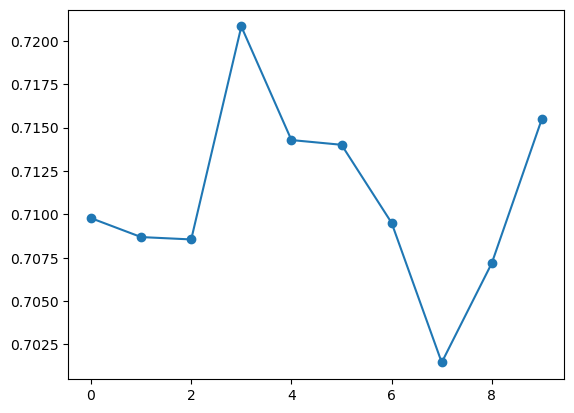

In [344]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.1, random_state=2)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, data['sentiment'], cv=shuffle_split, scoring='accuracy')
x = []
# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")
    x.append(score)

# Menampilkan rata-rata skor akurasi dari cross-validation
print(len(x))
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))
print("Skor tertinggi: {:.2f} %".format(scores.max()*100))
plt.plot(range(len(x)), x, marker='o')

In [345]:
acc_mnb = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, y_pred))

Accuracy: 0.7146
Confusion matrix:
 [[ 724  387   50]
 [ 462 2182  580]
 [ 204  409 2331]]
              precision    recall  f1-score   support

    Negative       0.52      0.62      0.57      1161
     Neutral       0.73      0.68      0.70      3224
    Positive       0.79      0.79      0.79      2944

    accuracy                           0.71      7329
   macro avg       0.68      0.70      0.69      7329
weighted avg       0.72      0.71      0.72      7329



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 724  387   50]
 [ 462 2182  580]
 [ 204  409 2331]]


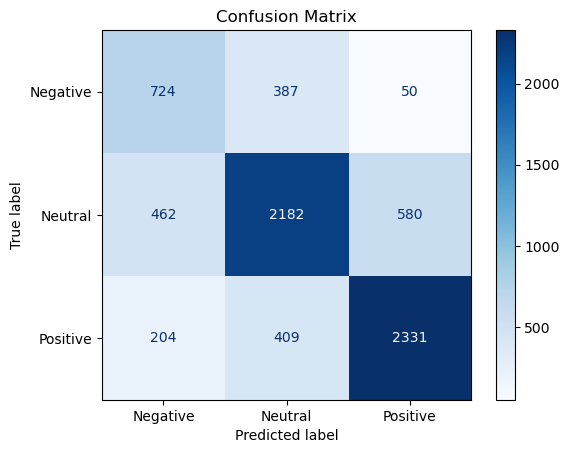

In [346]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 6952  3082   392]
 [ 2685 21753  4540]
 [ 1377  2844 22330]]


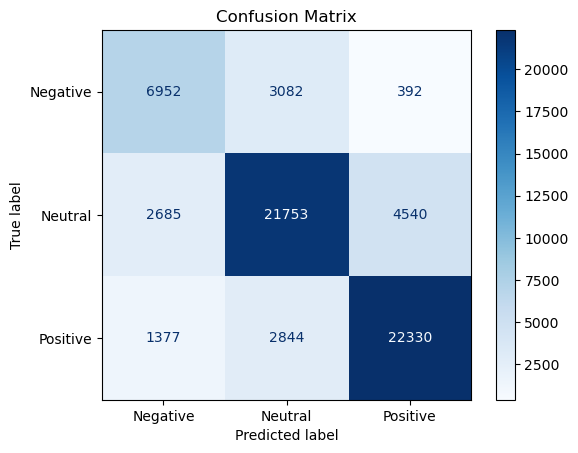

In [355]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_train, y_train,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [347]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:71.46%
Presisi: 72.11%
Recall:71.46%
F1-score:71.66%
Persentase Klasifikasi:
Positif: 40.4%
Negatif: 19.0%
Netral: 40.6%


In [70]:
print(X_test)

  (0, 44081)	1
  (0, 2259)	1
  (0, 4341)	1
  (0, 46305)	1
  (0, 41001)	1
  (0, 42423)	1
  (1, 44081)	1
  (1, 14088)	1
  (1, 52015)	1
  (1, 45812)	1
  (1, 26378)	1
  (1, 50037)	1
  (1, 49794)	1
  (1, 21902)	1
  (1, 8496)	1
  (2, 44081)	1
  (2, 30161)	1
  (2, 31526)	1
  (2, 4065)	1
  (2, 47861)	1
  (2, 8279)	1
  (2, 2185)	1
  (2, 3278)	1
  (2, 52591)	1
  (2, 1023)	1
  :	:
  (19311, 32366)	1
  (19311, 18858)	1
  (19311, 2203)	1
  (19311, 26741)	1
  (19311, 32491)	1
  (19311, 25148)	1
  (19311, 15334)	1
  (19311, 17690)	1
  (19311, 27370)	1
  (19311, 27923)	1
  (19311, 6292)	1
  (19311, 35773)	1
  (19311, 27862)	1
  (19311, 43964)	1
  (19312, 44081)	2
  (19312, 23606)	1
  (19312, 19362)	1
  (19312, 29731)	1
  (19312, 29081)	1
  (19312, 57142)	1
  (19312, 35389)	1
  (19312, 2203)	1
  (19312, 20260)	1
  (19312, 49964)	1
  (19312, 51788)	1


In [256]:
print(training.predict_proba(X_test))

[[4.92592551e-04 9.99128103e-01 3.79304137e-04]
 [4.17316959e-02 2.07432118e-01 7.50836186e-01]
 [1.76896247e-02 7.68204617e-01 2.14105758e-01]
 ...
 [2.77868872e-02 9.28564564e-01 4.36485485e-02]
 [5.97038058e-03 5.15861534e-01 4.78168085e-01]
 [2.11299176e-09 9.99160687e-01 8.39310760e-04]]


In [136]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    pred = naive_bayes.predict(X_input)
    positive_count = (y_pred == 'Positive').sum()
    negative_count = (y_pred == 'Negative').sum()
    neutral_count = (y_pred == 'Neutral').sum()
    na = training.predict_proba(X_input)
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", pred[0], na)
    print()

Hasil Prediksi:  Neutral [[0.38761695 0.50546669 0.10691636]]

Hasil Prediksi:  Neutral [[0.34792548 0.45307563 0.19899889]]

Hasil Prediksi:  Positive [[0.115965   0.41002893 0.47400607]]

Hasil Prediksi:  Negative [[0.56159277 0.14766027 0.29074696]]

Hasil Prediksi:  Positive [[0.01595928 0.01096382 0.9730769 ]]

Hasil Prediksi:  Neutral [[0.18205214 0.51017664 0.30777122]]



In [348]:
data.tweet.iloc[43]

'puan maharani sosok usung pdi juang capres cawapres pilpres pdip diniliai cetak sejarah andai usung puan puan capres pdip'

In [96]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    y_pred = naive_bayes.predict(X_input)
    
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", y_pred[0])
    print()

Hasil Prediksi:  Neutral



In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=None)
naive_bayes = MultinomialNB()
training = naive_bayes.fit(X_train, y_train)

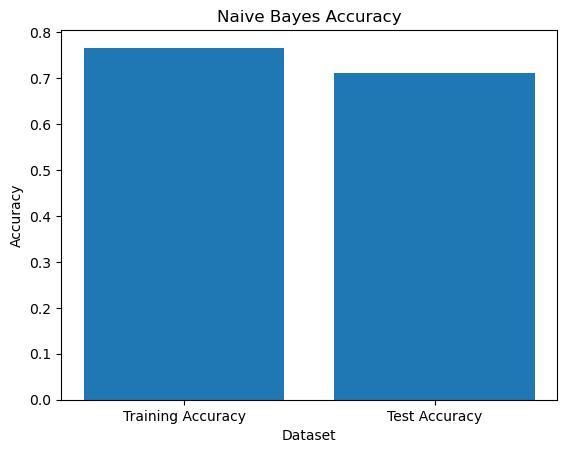

0.05566315837033109


In [362]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi label pada data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung akurasi pada data latih dan data uji
akurasi_train = accuracy_score(y_train, y_train_pred)
akurasi_test = accuracy_score(y_test, y_test_pred)

# Membuat grafik akurasi
labels = ['Training Accuracy', 'Test Accuracy']
values = [akurasi_train, akurasi_test]

plt.bar(labels, values)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

print(akurasi_train - akurasi_test)

[0.1665905  0.12689568 0.11100255 0.0979127  0.09155383 0.08659774
 0.08306567 0.08306107 0.08419846 0.08165257]


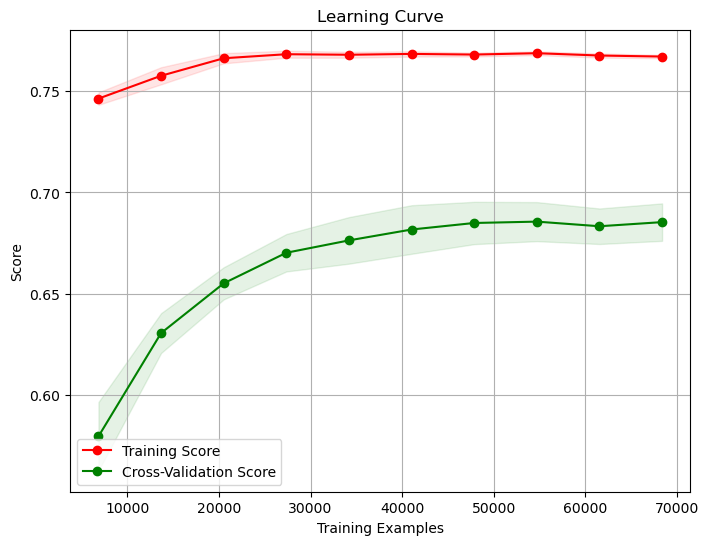

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=15, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    print(train_scores_mean - test_scores_mean)
    plt.legend(loc='best')
    plt.show()

# Contoh penggunaan
estimator = MultinomialNB()
plot_learning_curve(estimator, X, data['sentiment'])


In [342]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model Naive Bayes dengan fitur-fitur yang sudah dinormalisasi
model = MultinomialNB()
model.fit(X_train_scaled, y_train)

# Evaluasi model pada data uji
accuracy = model.score(X_test_scaled, y_test)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.